In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$P_{(dx, dy)}=\|P(i, j)\|_{256 \times 256}$$

\begin{equation}
P(i, j)=\sum_{x=1}^{N} \sum_{y=1}^{M}\left\{\begin{array}{ll}
1, & \text { якщо } I(x, y)=i \text { та } I(x+d x, y + d y)=j ; \\
0, & \text { в інших випадках }
\end{array}\right.
\end{equation}

In [2]:
def p(i,j, matr, d):
    n_rows, n_cols = matr.shape
    dx, dy = d
    
    res = 0
    for x in range(n_rows):
        for y in range(n_cols):
            # check for being in image's bounds
            props1 = [x + dx  < n_rows, y + dy < n_cols]
            
            if all(props1):
                if matr[x][y] == i and matr[x + dx][y + dy] == j:
                    res += 1
    
                
    return res

def coincidence_matr(image, d):
    """
    d -- (dx, dy) vector
    image -- N x M matrix (built by image)
    """
    
    res_matr = np.zeros((256, 256))
    vmin, vmax = image.min(), image.max()
    
    # it actually makes sense to look only at
    # rectangle (vmnin x vmax) and make the least
    # equals zero
    for i in range(vmin, vmax):
        for j in range(vmin, vmax):
            res_matr[i, j] = p(i, j, image, d)
            
            
    return res_matr
            

\begin{aligned}
\hat{P}=\frac{1}{8}\left(P_{(0, dy)}+P_{(0,-dy)}\right.&+P_{(-dx, dy)}+P_{(dx,-dy)}+\\
&\left.+P_{(-dx, 0)}+P_{(dx, 0)}+P_{(-dx,-dy)}+P_{(dx, dy)}\right)
\end{aligned}

In [3]:
def mean_coincidence_matr(image, d):
    """
    image is given matrix
    d is (dx, dy) 2-dim vector
    """
    dx, dy = d
    
    D = [(0, dy), (0, -dy), (-dx, dy), (dx, -dy), (-dx,0),
    (dx, 0), (-dx, -dy), (dx, dy)]
    
    res_matr = np.zeros((256, 256))
    if d != (0, 0):
        for d_i in D:
            res_matr += coincidence_matr(ex1, d_i)
        
        return 1 / 8 * (res_matr)
    else:
        return coincidence_matr(ex1, d)

In [4]:
matrices = []

for i in range(6):
    matrices.append([])
    with open(fr"D:\Documents\Курсова файли\needed_files\404\1_{i+1}_Gray.txt") as f:
        lines = f.readlines()
        for line in lines:
            t = [float(x) for x in line.split()]
            matrices[i].append(t)

In [5]:
ex1 = np.array(matrices[0][:-1], dtype=int)

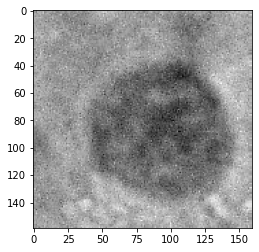

In [6]:
plt.imshow(ex1, cmap='gray') 

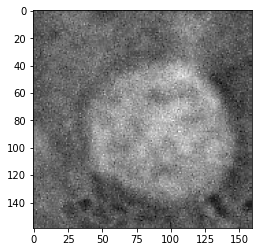

In [7]:
plt.imshow(ex1, cmap='gray_r')  

In [8]:
%%time
d = (0, 1)

ex1_res_ = coincidence_matr(ex1, d)

Wall time: 26.6 s


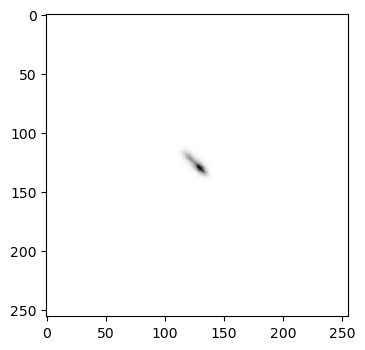

In [11]:
plt.figure(dpi=100)
plt.imshow(ex1_res_, cmap='gray_r')

In [12]:
%%time
ex1_res_mean = mean_coincidence_matr(ex1, d)

Wall time: 3min 24s


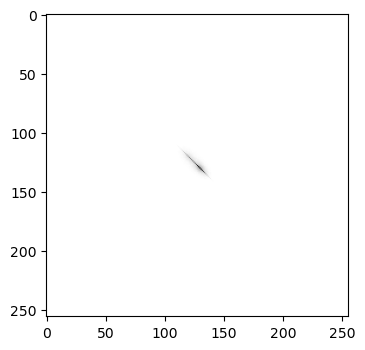

In [13]:
plt.figure(dpi=100)
plt.imshow(ex1_res_mean, cmap='gray_r')